### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [31]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [45]:
date = '2018-12-06_10h49'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/' + date + '/'


In [46]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [47]:
# read data into pandas dataframe
file_name = 'dstat_server_cpu_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c = df_c[df_c['client']<=80]
df_c

,client,cpu_mean,cpu_std
0,2,5.177131,0.362739
1,8,8.631202,0.207791
2,16,7.562098,0.339820
3,32,7.780443,0.345250
4,48,7.776208,0.498811
5,64,8.380399,0.387485
6,80,7.811448,0.330669


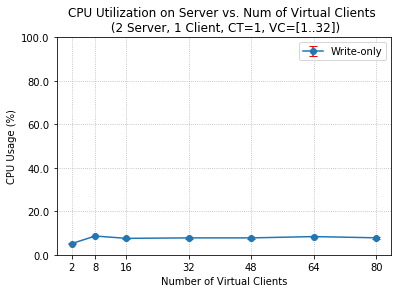

In [48]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (2 Server, 1 Client, CT=1, VC=[1..32])")

vcs = df_c['client']
ys = df_c['cpu_mean']
std = df_c['cpu_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Write-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [56]:
# read data into pandas dataframe
file_name = 'dstat_server_netsend_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c = df_c[df_c['client']<=80]
df_c

,client,netsend_mean,netsend_std
0,2,4.000837e+06,153223.852973
1,8,1.176103e+07,132625.294335
2,16,1.200092e+07,105971.234299
3,32,1.188651e+07,67033.102609
4,48,1.213132e+07,293098.109480
5,64,1.221445e+07,149174.584630
6,80,1.216338e+07,50069.432263


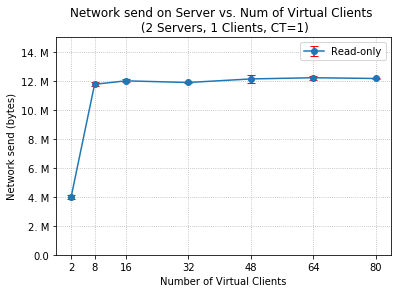

In [58]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (2 Servers, 1 Clients, CT=1)")

vcs = df_c['client']
ys = df_c['netsend_mean']
std = df_c['netsend_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Read-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=15000000)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [14]:
# read data into pandas dataframe
file_name = 'dstat_client_netrecv_ratio_0:1.csv'
df_c = pd.read_csv(base_path + file_name)
df_c = df_c[df_c['client']<=80]
df_c

,client,netrecv_mean,netrecv_std
0,4,2.336878e+07,414989.624901
1,8,2.531497e+07,53261.866110
2,16,2.538449e+07,37887.447480
3,32,2.539987e+07,39628.507009
4,48,2.541664e+07,22697.950147
5,64,2.538554e+07,11746.915814
6,80,2.541434e+07,8647.365261


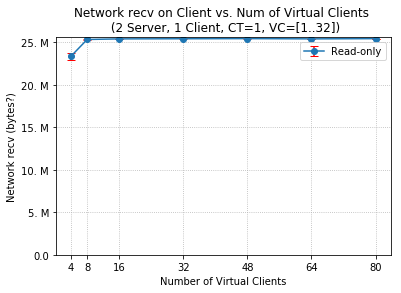

In [15]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (2 Server, 1 Client, CT=1, VC=[1..32])")

vcs = df_c['client']
ys = df_c['netrecv_mean']
std = df_c['netrecv_std']
plt.errorbar(x = vcs, y = ys, yerr = std, label = "Read-only", capsize = 4, ecolor='r', marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0)
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/1_BaselineWithoutMW/processed_data/two_servers/"+date+"/"+file_name[:-4]+".png", dpi = 150)